In [1]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix,classification_report
import os
from tensorflow.keras.optimizers import RMSprop,Adam

In [2]:
TRAINING_APPLE_BRAEBURN = os.path.join("../fruits-360/Training/Apple Braeburn")
# TESTING_DATASET = os.path.join("fruits-360/Test")
apple_files=os.listdir(TRAINING_APPLE_BRAEBURN)


# Check if files are completely loaded

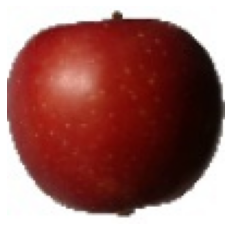

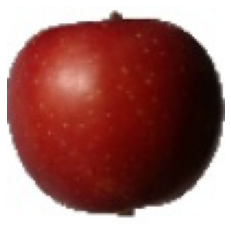

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 20

next_apple_braeburn = [os.path.join(TRAINING_APPLE_BRAEBURN, fname) 
                for fname in apple_files[pic_index-2:pic_index]]
for i, img_path in enumerate(next_apple_braeburn):
  #print(img_path)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

In [4]:
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
split_data = 0.2
Training_directory=os.path.join("../fruits-360/Training")

Testing_directory=os.path.join("../fruits-360/Test")


# USing image augmentation
training_datagen = ImageDataGenerator(
                    rescale = 1./255.,
                    rotation_range = 30,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    vertical_flip = True,
                    fill_mode = 'nearest'
)

testing_datagen = ImageDataGenerator(rescale = 1./255.)

training_data = training_datagen.flow_from_directory(
                    Training_directory,
                    target_size = (32,32), 
                    batch_size = 16,
                    class_mode = 'categorical'
)

testing_data = testing_datagen.flow_from_directory(
                    Testing_directory,
                    target_size = (32,32),
                    batch_size = 16,
                    class_mode = 'categorical'
)
print(len(training_data))


Found 20466 images belonging to 40 classes.
Found 6875 images belonging to 40 classes.
1280


In [5]:
labels=os.listdir(Training_directory)
number_classes = len(labels)
print(number_classes)
print(len(Training_directory))

class MyCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epochs,logs={}):
        accuracy = logs['acc']
        if (accuracy >= 0.99):
            print("\n Finished because accuracy is greater than 95")
            self.model.stop_training=True


callback = MyCallBack()

40
22


In [6]:
batch_size = 16
nb_train_samples = 20466
nb_validation_samples = 6875

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3),padding="same",input_shape = (32,32,3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32, (3, 3),activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dense(number_classes,activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['acc'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

In [9]:

history = model.fit_generator(
    training_data,
    steps_per_epoch =  nb_train_samples // batch_size,
    epochs = 10,
#     callbacks = callbacks,
    validation_data = testing_data,
    validation_steps = nb_validation_samples // batch_size,
callbacks=[callback])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
1279/1279 [==============================] - 1375s 1s/step - loss: 0.7705 - acc: 0.7533 - val_loss: 0.3098 - val_acc: 0.9001
Epoch 2/10
1279/1279 [==============================] - 788s 616ms/step - loss: 0.2882 - acc: 0.9092 - val_loss: 0.1575 - val_acc: 0.9448
Epoch 3/10
1279/1279 [==============================] - 99s 77ms/step - loss: 0.2316 - acc: 0.9308 - val_loss: 0.4992 - val_acc: 0.9021
Epoch 4/10
1279/1279 [==============================] - 79s 62ms/step - loss: 0.2070 - acc: 0.9405 - val_loss: 0.0792 - val_acc: 0.9748
Epoch 5/10
1279/1279 [==============================] - 79s 61ms/step - loss: 0.1851 - acc: 0.9494 - val_loss: 0.0722 - val_acc: 0.9776
Epoch 6/10
1279/1279 [==============================] - 82s 64ms/step - loss: 0.1867 - acc: 0.9525 - val_loss: 0.0637 - val_acc: 0.9767
Epoch 7/10
1279/1279 [==============================] - 112s 87ms/step - loss: 0.1732 - acc: 0.9568 - val_

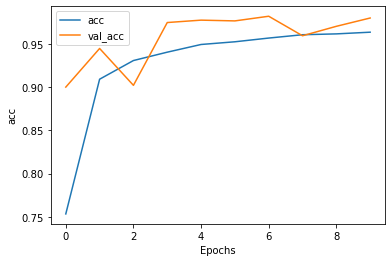

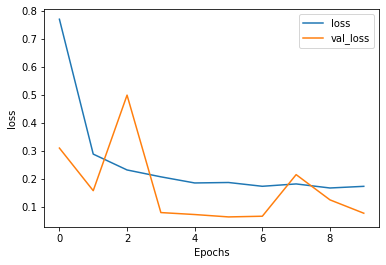

In [10]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
plot_graphs(history, "acc")
plot_graphs(history, "loss")

In [11]:
model.save("With 3 layers 32 by 32.h5")

 # With 4 layers using Batch Normalization

In [12]:
model1 = tf.keras.Sequential()
# First layers
model1.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model1.add(tf.keras.layers.BatchNormalization())
model1.add(tf.keras.layers.MaxPooling2D(2,2))
# Second Layer
model1.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D(2,2))
# Third Layer
model1.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D(2,2))
# Flatten Layer
model1.add(tf.keras.layers.Flatten())
# HIdden Dense layer
model1.add(tf.keras.layers.Dense(256,activation='relu'))
model1.add(tf.keras.layers.Dropout(0.2))
# Output Layer
model1.add(tf.keras.layers.Dense(number_classes,activation='softmax'))
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 2, 128)        

In [13]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("C:/Users/Ganesh/Documents/tensorflow/Image Processing/models/best_cnn_model_batch_normalization.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

callbacks = [earlystop, checkpoint]

history1 = model1.fit_generator(training_data,
    steps_per_epoch =  nb_train_samples // batch_size,
    epochs = 10,
#     callbacks = callbacks,
    validation_data = testing_data,
    validation_steps =  nb_validation_samples // batch_size,
callbacks=callbacks)

Epoch 1/10
1279/1279 [==============================] - ETA: 0s - loss: 0.6868 - acc: 0.7824
Epoch 00001: val_loss improved from inf to 0.38794, saving model to C:/Users/Ganesh/Documents/tensorflow/Image Processing/models/best_cnn_model_batch_normalization.h5
1279/1279 [==============================] - 94s 74ms/step - loss: 0.6868 - acc: 0.7824 - val_loss: 0.3879 - val_acc: 0.8775
Epoch 2/10
1279/1279 [==============================] - ETA: 0s - loss: 0.1984 - acc: 0.9342
Epoch 00002: val_loss improved from 0.38794 to 0.19805, saving model to C:/Users/Ganesh/Documents/tensorflow/Image Processing/models/best_cnn_model_batch_normalization.h5
1279/1279 [==============================] - 94s 73ms/step - loss: 0.1984 - acc: 0.9342 - val_loss: 0.1980 - val_acc: 0.9391
Epoch 3/10
1279/1279 [==============================] - ETA: 0s - loss: 0.1371 - acc: 0.9568
Epoch 00003: val_loss did not improve from 0.19805
1279/1279 [==============================] - 93s 73ms/step - loss: 0.1371 - acc: 0

In [14]:
model1.evaluate(testing_data)

430/430 [==============================] - 10s 23ms/step - loss: 0.1479 - acc: 0.9721


[0.1479005515575409, 0.9720727205276489]

In [15]:
model1.save("classify_fruit_model_loss.h5")

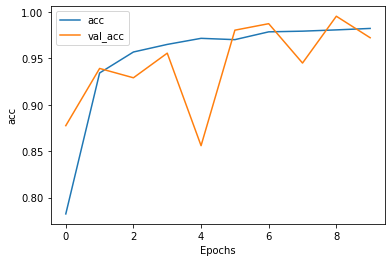

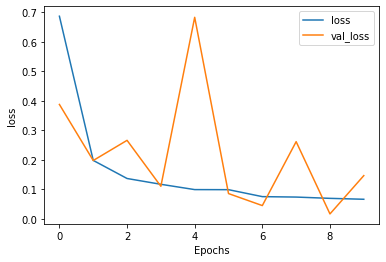

In [16]:
plot_graphs(history1, "acc")
plot_graphs(history1, "loss")